In [15]:
#This is NOT the final submission (for Rahul/Jeffery)
    #- the final Submission is in Jeffery Lu's Directiory

import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer

## Exercise 3.10: Random trees and forests

In this exercise, we will try to classify images of breast cancer cells as malignant or benign using decision tree and random forest methods. The dataset includes various features of images of cell nuclei, such as their perimeter, symmetry, etc. For our purposes, we will only use the first two features for each cell: their radius and texture. First we load and plot the data.



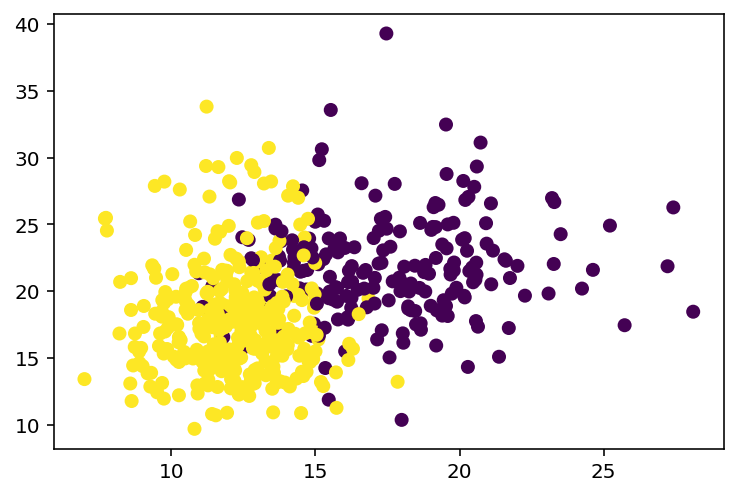

In [16]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True) # X denotes features, y denotes labels
# a y value of 1 means the cell is benign
X = X[:, :2]
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### Part (a): Unregularized tree

Split the data 25%-75% into testing and training data. Train a decision tree, with Gini impurity as the split criterion, without any regularization on the training data, then report the accuracy of this tree on the training and testing data. You can use `sklearn.model_selection.train_test_split` to split the data, and `sklearn.tree.DecisionTreeClassifier` for training the tree. You can also use `sklearn.metrics.accuracy_score` to evaluate the accuracy of your model. You might also be interested in using the `plot_tree` function to visualize your decision tree.

Hint: read the following two pages carefully: 

* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* https://scikit-learn.org/stable/modules/tree.html#tree

Your code shouldn't be longer than around 20 lines.



In [1]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

c = DecisionTreeClassifier()

c = c.fit(X_train,y_train)

y_hat = c.predict(X_test)
tree.plot_tree(c,filled=True)
tree1 = c
print("Accuracy- ",metrics.accuracy_score(y_test, y_hat))

NameError: name 'X' is not defined

### Part(b): Regularized tree

Now try regularizing your tree by setting `max_depth` in `DecisionTreeClassifier` to various values. Play around a bit! What values give you the best training error? What values give you the best testing error? Make some plots of `max_depth` versus training and testing error. What are your findings? How can you explain these findings?

- The maximized training error is given by the index 1 and value 
- The best testing accuracy is ~0.85 and is at index 1
- The training error is decreasing and acting as a trade off for testing error



Max Test Accuracy-  0.8461538461538461
Max Test Accuracy Index: 1


Max Train Accuracy-  1.0
Max Train Accuracy Index: 1


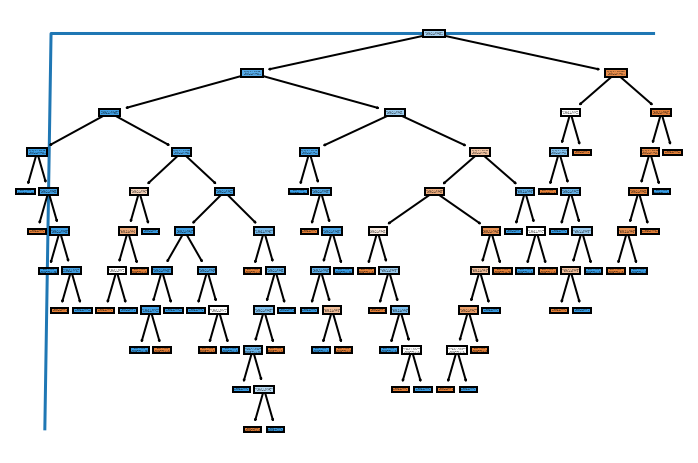

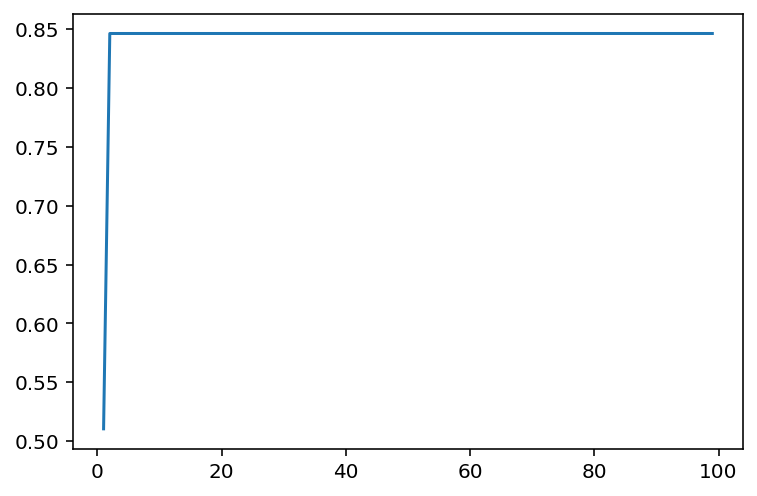

In [82]:
# your code here...
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

c = DecisionTreeClassifier()
c = c.fit(X_train,y_train)

maxtrain = 0
maxDextrain = -1
maxtest = 0
maxDextest = -1

xs = []
trainings = []
testings = []



for x in range(1,100):
    xs.append(x)
    trainings.append(metrics.accuracy_score(y_train, y_hat))
    testings.append(metrics.accuracy_score(y_test, y_hat2))
    c.max_depth = x
    y_hat = c.predict(X_train)
    y_hat2 = c.predict(X_test)

    
    if (metrics.accuracy_score(y_train, y_hat) > maxtrain):
        maxtrain = metrics.accuracy_score(y_train, y_hat)
        maxDextrain = x
   
    if (metrics.accuracy_score(y_test, y_hat2) >maxtest):
        maxtest = metrics.accuracy_score(y_test, y_hat2)
        maxDextest = x
        

print("Max Test Accuracy- ", maxtest)
print("Max Test Accuracy Index: " + str(maxDextest))
c.max_depth = maxDextest
tree.plot_tree(c,filled=True)
print("Max Train Accuracy- ", maxtrain)
print("Max Train Accuracy Index: " + str(maxDextrain))
c.max_depth = maxDextrain
tree.plot_tree(c,filled=True)
plt.plot(xs,trainings)
plt.show()
plt.plot(xs,testings)
tree2 = c

### Part (c): Visualizing your results

The function `plot_regions` will plot the decision regions of a trained decision tree `h` on the breast cancer data. Run it on your tree from part (a) and the best regularized tree from (b).

In [85]:
def plot_regions(h):
    plot_colors = ['yellow', 'purple']
    plot_step = 0.02
    
    breast_cancer = load_breast_cancer()
    X = breast_cancer.data
    y = breast_cancer.target
    
    plt.clf()
    idx = np.arange(X.shape[0])
    
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    
    x_min , x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min , y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),P
                         np.arange(y_min, y_max, plot_step ))
    
    Z = h.predict(np.c_[xx.ravel(), yy.ravel ()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx , yy , Z, cmap=plt.cm.Paired)
    
    plt.xlabel(breast_cancer.feature_names [0])
    plt.ylabel(breast_cancer.feature_names [1])
    plt.axis("tight")
    for i, color in zip(range(2),  plot_colors ):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,
                    label=breast_cancer.target_names[i],
                    cmap=plt.cm.Paired)

plot_regions(tree1)
plot_regions(tree2)

SyntaxError: invalid syntax (3155154400.py, line 19)

In [0]:
# your code here...

### Part (d)

Now using `sklearn.ensemble.RandomForestClassifier`, train a random forest on the training data and report training and testing accuracy. Do this for varying number of trees by adjusting the parameter `n_estimators` and varying values of `max_depth` and report your findings. Is the best value of `max_depth` for a single tree also the best value for a random forest?

In [0]:
# your code here...
